# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Kornelius Setiawan
- **Email:** korneliussetiawan10@gmail.com
- **ID Dicoding:** kornel10_PFds

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak dibeli dan tidak?
- Metode pembayaran mana yang paling banyak dan sedikit digunakan oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [17]:
%pip install gdown
import gdown
import os
import zipfile
import pandas as pd

%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

%pip install geopandas
import geopandas as gpd

%pip install folium
import folium
from folium.plugins import HeatMap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: folium in c:\users\user\appdata\local\programs\python\python312\lib\site-packages (0.19.5)




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Wrangling

### Gathering Data

In [18]:
# URL file di Google Drive
url = 'https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK'
output = 'dataset.zip'

# Folder untuk mengekstrak file
output_folder = 'data'

# Download file dari Google Drive
gdown.download(url, output, quiet=False)

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Ekstrak file ZIP
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

print(f"File berhasil diunduh dan diekstrak di folder: {output_folder}")

os.remove(output)

Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=f55d362d-63a9-4d85-afc7-e4cb3bf819ff
To: c:\Users\User\Downloads\submission\dataset.zip
100%|██████████| 44.9M/44.9M [00:55<00:00, 816kB/s] 


File berhasil diunduh dan diekstrak di folder: data


#### **Customers dataset**

In [19]:
customers_df = pd.read_csv('./data/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### **Geolocation dataset**

In [20]:
geolocation_df = pd.read_csv('./data/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### **Order items dataset**

In [21]:
order_items_df = pd.read_csv('./data/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### **Order payments dataset**

In [22]:
order_payments_df = pd.read_csv('./data/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### **Order reviews dataset**

In [23]:
order_reviews_df = pd.read_csv('./data/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### **Orders dataset**

In [24]:
orders_df = pd.read_csv('./data/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### **Product category dataset**

In [25]:
product_category_df = pd.read_csv('./data/E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### **Products dataset**

In [26]:
products_df = pd.read_csv('./data/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### **Sellers dataset**

In [27]:
sellers_df = pd.read_csv('./data/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### **Insight:**
- Data diunduh langsung dari dari Google Drive menggunakan library `gdown`
- Dataset yang diperoleh antara lain :
  * Customers Dataset
  * Geolocation Dataset
  * Order Items Dataset
  * Order Payments Dataset.
  * Order Reviews Dataset
  * Product Category Name Dataset
  * Products Dataset
  * Sellers Dataset


### Assessing Data

#### Menilai tabel `customers_df`

In [28]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [29]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [30]:
print("Jumlah duplikat: ", customers_df.duplicated().sum())

Jumlah duplikat:  0


In [31]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `geolocation_df`

In [32]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [33]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [34]:
print("Jumlah duplikat: ", geolocation_df.duplicated().sum())

Jumlah duplikat:  261831


In [35]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai tabel `order_items_df`

In [36]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [37]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [38]:
print("Jumlah duplikat: ", order_items_df.duplicated().sum())

Jumlah duplikat:  0


In [39]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `order_payments_df`

In [40]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [41]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [42]:
print("Jumlah duplikat: ", order_payments_df.duplicated().sum())

Jumlah duplikat:  0


In [43]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel `order_reviews_df`

In [44]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [45]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [46]:
print("Jumlah duplikat: ", order_reviews_df.duplicated().sum())

Jumlah duplikat:  0


In [47]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `orders_df`

In [48]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [49]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [50]:
print("Jumlah duplikat: ", orders_df.duplicated().sum())

Jumlah duplikat:  0


In [51]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `product_category_df`

In [52]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [53]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [54]:
print("Jumlah duplikat: ", product_category_df.duplicated().sum())

Jumlah duplikat:  0


In [55]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai tabel `products_df`

In [56]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [57]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [58]:
print("Jumlah duplikat: ", products_df.duplicated().sum())

Jumlah duplikat:  0


In [59]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `sellers_df`

In [60]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [61]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [62]:
print("Jumlah duplikat: ", sellers_df.duplicated().sum())

Jumlah duplikat:  0


In [63]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### **Insight:**
- `customers_df` :
    * memiliki 99.441 baris dan 5 kolom
    * tidak ada duplicate data
    * tidak ada missing value
- `geolocation_df` :
    * memiliki 1.000.163 baris dan 5 kolom
    * terdapat 261.831 duplicate data
    * tidak ada missing value
- `order_items_df` :
    * memiliki 112.650 baris dan 7 kolom
    * kesalahan tipe pada kolom `shipping_limit_date`
    * tidak ada duplicate data
    * tidak ada missing value
- `order_payments_df` :    
    * memiliki 103.886 baris dan 5 kolom
    * tidak ada duplicate data
    * tidak ada missing value
- `order_reviews_df` :
    * memiliki 99.224 baris dan 7 kolom
    * kesalahan tipe pada kolom `review_creation_date` dan `review_answer_timestamp`
    * tidak ada duplicate data
    * terdapat missing value pada kolom `review_comment_title` dan `review_comment_message`
- `orders_df` :
    * memiliki 99.441 baris dan 8 kolom
    * kesalahan tipe pada kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`,  `order_delivered_customer_date`, `order_estimated_delivery_date`
    * tidak ada duplicate data
    * terdapat missing value pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date	`
- `product_category_df` :
    * memiliki 71 baris dan 2 kolom
    * tidak ada duplicate data
    * tidak ada missing value
- `products_df` :
    * memiliki 32.951 baris dan 9 kolom
    * tidak ada duplicate data
    * terdapat missing value pada semua kolom kecuali `product_id`
- `sellers_df` :
    * memiliki 3.095 baris dan 4 kolom
    * tidak ada duplicate data
    * tidak ada missing value


### Cleaning Data

#### Membersihkan tabel `geolocation_df`

##### Duplicate data

In [64]:
geolocation_df.duplicated().sum()

261831

In [65]:
geolocation_df.drop_duplicates(inplace=True)

In [66]:
print("Jumlah duplikat: ", geolocation_df.duplicated().sum())
geolocation_df.info()

Jumlah duplikat:  0
<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


#### Membersihkan tabel `order_items_df`

##### Memperbaiki tipe data

In [67]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [68]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [69]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan tabel `order_reviews_df`

##### Memperbaiki tipe data

In [70]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [71]:
column = ["review_creation_date", "review_answer_timestamp"]
for column in column:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [72]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


##### Missing values

In [73]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


In [74]:
order_reviews_df['review_comment_title'].fillna('No Comment Title', inplace=True)
order_reviews_df['review_comment_message'].fillna('No Comment' ,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8816\2997809823.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df['review_comment_title'].fillna('No Comment Title', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8816\2997809823.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [75]:
print(order_reviews_df.isna().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


#### Membersihkan tabel `orders_df`

##### Memperbaiki tipe data

In [76]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [77]:
column = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in column:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [78]:
orders_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [79]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Missing values

In [80]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [81]:
orders_df.dropna(axis=0, inplace=True)

In [82]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Membersihkan tabel `products_df`

##### Missing values

In [83]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [84]:
products_df.product_name_lenght.fillna(products_df.product_name_lenght.median(),inplace=True)
products_df.product_category_name.fillna(products_df.product_category_name.mode()[0],inplace=True)
products_df.product_description_lenght.fillna(products_df.product_description_lenght.median(),inplace=True)
products_df.product_photos_qty.fillna(products_df.product_photos_qty.median(),inplace=True)

products_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8816\436118405.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_name_lenght.fillna(products_df.product_name_lenght.median(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8816\436118405.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [85]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

####**Insight:**
- `geolocation_df`:
    * Menghilangkan duplicate data
- `order_items_df`:
    * Memperbaiki tipe data
- `order_reviews_df` :    
    * Memperbaiki tipe data
    * Menangani missing values
- `orders_df` :    
    * Memperbaiki tipe data
    * Menangani missing values
- `products_df`:
    * Menangani missing values

## Exploratory Data Analysis (EDA)

### Explore tabel `customers_df`

In [86]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
21386,9c71a88f010a258dcf8fc459e0de1b22,179b8553e1b5ba647057676833713302,22250,rio de janeiro,RJ
59596,83b89cf9c779a9cd373086ac6bfe4216,90cc5067067bd4540ec8d22fa3208b92,4690,sao paulo,SP
76303,60c8baa971d3781e122f7ff8eb3a6be6,cd0e1237fc1c9e98561d3b5e7123874f,65068,sao luis,MA
3951,5f094bc01990b97538d746f0cee0e7b7,c81ecdcafcc7319de10767cfe8478c86,5601,sao paulo,SP
70739,a3552008b1cf707a84d3c8124acdb7ca,2a7728b8d57b8876d36069dc52f79e21,9220,santo andre,SP


In [87]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [88]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore tabel `orders_df`

In [89]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
43643,e5a3a83c5cfbe529d5f4e6da9587f5b9,a02bd6ebbfe3fc14c3579861909c6358,delivered,2018-07-20 09:24:27,2018-07-20 09:43:42,2018-07-20 13:57:00,2018-07-25 22:56:50,2018-08-03
33548,32b65057542330adb6513a62849221be,8ec1b67247c93d68d97c6e7452a34517,delivered,2017-07-18 17:02:49,2017-07-19 17:24:50,2017-07-20 16:16:56,2017-07-31 20:51:36,2017-08-22
86681,8732033fb707f8ee6155112c39a727b4,d34dfd38d5a09cfde6f512ed4ecb9600,delivered,2018-04-19 18:50:44,2018-04-19 19:10:58,2018-04-20 20:12:33,2018-05-11 11:13:44,2018-05-18
1112,1342ab50383d7471a3bfd75ca93d38d6,a31f3b93bfe2d5bd18745603e3e537c5,delivered,2018-08-23 14:56:46,2018-08-23 15:45:06,2018-08-24 11:59:00,2018-08-30 15:06:32,2018-08-31
5584,e2ba84b9fda1f36c6b2ae25097ef72e0,97de1f2c8777fcb7d6000cda55786124,delivered,2018-02-27 15:23:07,2018-02-27 15:35:29,2018-03-02 20:04:59,2018-03-07 23:03:54,2018-03-29


In [90]:
orders_df.order_status.value_counts()

order_status
delivered    96455
canceled         6
Name: count, dtype: int64

In [91]:
orders_df = orders_df[orders_df.order_status != "canceled"]
orders_df.order_status.value_counts()

order_status
delivered    96455
Name: count, dtype: int64

### Explore `customers_df` dan `orders_df`

#### Menggabungkan data `customers_df` dan `orders_df`

In [92]:
orders_customers_df = pd.merge(customers_df, orders_df, on="customer_id", how="left")
orders_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [93]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo                 15043
rio de janeiro             6600
belo horizonte             2697
brasilia                   2071
curitiba                   1489
                          ...  
santo antonio de goias        0
baguari                       0
alto bela vista               0
caetanos                      0
jataizinho                    0
Name: order_id, Length: 4119, dtype: int64

### Explore `order_items_df`

In [94]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
67042,994138db2313a294b3d23c7cf6ee7389,1,7e93d6b6ef018d488da72952ce48fb9a,46dc3b2cc0980fb8ec44634e21d2718e,2018-01-29 13:01:14,269.99,22.73
8771,14154a306b926b62ae99f4ad34bfb206,1,6e835aea84ae8eb68b8c14878dd43b30,4d6d651bd7684af3fffabd5f08d12e5a,2017-10-31 14:45:40,69.90,20.98
80998,b829a9df2bfb08f7e2a0e9854656fdfd,2,0bcc3eeca39e1064258aa1e932269894,1f50f920176fa81dab994f9023523100,2018-07-16 10:50:16,49.90,20.99
87069,c5b8e6bc67cded6cf23ac6fe3ba57d02,2,389d119b48cf3043d311335e499d9c6b,1f50f920176fa81dab994f9023523100,2018-05-07 11:11:13,53.90,16.07
43207,62419df94d06b6b6bf72229e1acbf3fb,2,1e15e15a2cf0210505c942496b19c917,960945e1a9535cbc0cd6ddd35fbe7ae8,2018-08-23 10:35:24,37.50,9.01


### Explore `orders_customers_df` dan `order_items_df`

#### Menggabungkan data `orders_customers_df` dan `order_items_df`

In [95]:
orders_customers_df = pd.merge(orders_customers_df, order_items_df, on="order_id", how="left")
orders_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


### Explore `order_payments_df`

In [96]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
73333,27d948e8e3d9abb11648cfa05b1ce3f7,1,credit_card,2,52.10
60973,e53516f14e3cc830f4afa84315707e9a,1,boleto,1,33.40
64899,83e9b645bb34b16b05add091d031f417,1,credit_card,15,242.80
59358,c7d894c7be2eb461fb04d81e82f0814d,1,credit_card,1,100.22
3504,7535955a5fee70328e9fe079653e03f1,1,credit_card,1,209.67


In [97]:
order_payments_df.groupby('payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [98]:
order_payments_df[order_payments_df['payment_value'] > 300].groupby('payment_type')['order_id'].nunique().sort_values(ascending=False)

payment_type
credit_card    8302
boleto         1661
debit_card      111
voucher         106
Name: order_id, dtype: int64

### Explore `orders_customers_df` dan `order_payments_df`

#### Menggabungkan data `orders_customers_df` dan `order_payments_df`

In [99]:
orders_customers_df = pd.merge(orders_customers_df, order_payments_df, on="order_id", how="inner")
orders_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1,credit_card,8,252.25


In [100]:
orders_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115011 entries, 0 to 115010
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115011 non-null  object        
 1   customer_unique_id             115011 non-null  object        
 2   customer_zip_code_prefix       115011 non-null  int64         
 3   customer_city                  115011 non-null  object        
 4   customer_state                 115011 non-null  object        
 5   order_id                       115011 non-null  object        
 6   order_status                   115011 non-null  object        
 7   order_purchase_timestamp       115011 non-null  datetime64[ns]
 8   order_approved_at              115011 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115011 non-null  datetime64[ns]
 10  order_delivered_customer_date  115011 non-null  datetime64[ns]
 11  

### Explore `products_df`

In [101]:
products_df.sample(5)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32949 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32949 non-null  object 
 1   product_category_name       32949 non-null  object 
 2   product_name_lenght         32949 non-null  float64
 3   product_description_lenght  32949 non-null  float64
 4   product_photos_qty          32949 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


### Explore `product_category_df`

In [102]:
product_category_df.sample(5)

,product_category_name,product_category_name_english
61,musica,music
43,construcao_ferramentas_iluminacao,construction_tools_lights
31,market_place,market_place
18,eletroportateis,small_appliances
3,cama_mesa_banho,bed_bath_table


### Explore `products_df` dan `product_category_df`

#### Menggabungkan data `products_df` dan `product_category_df`

In [103]:
products_df = pd.merge(left=products_df, right=product_category_df, left_on='product_category_name', right_on="product_category_name", how='inner')
products_df = products_df.drop(columns=['product_category_name'])
products_df = products_df.rename(columns={'product_category_name_english': 'product_category_name'})
products_df.head()


,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [104]:
products_df.groupby(by='product_category_name').product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
bed_bath_table           3638
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

In [105]:
products_df.groupby(by='product_category_name').product_id.nunique().sort_values(ascending=True).head(10)

product_category_name
cds_dvds_musicals                     1
security_and_services                 2
home_comfort_2                        5
fashion_childrens_clothes             5
tablets_printing_image                9
furniture_mattress_and_upholstery    10
la_cuisine                           10
diapers_and_hygiene                  12
flowers                              14
fashion_sport                        19
Name: product_id, dtype: int64

### Explore All Data

#### Menggabungkan semua data

In [106]:
all_df = pd.merge(left=orders_customers_df, right=products_df, left_on='product_id', right_on='product_id', how='inner')
all_df.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm    

In [107]:
all_df.groupby(by=['customer_city','product_category_name']).order_id.nunique().sort_values(ascending=False)

customer_city  product_category_name
sao paulo      bed_bath_table           1865
               health_beauty            1500
               sports_leisure           1229
               housewares               1083
               computers_accessories     980
                                        ... 
irai           housewares                  1
               computers_accessories       1
iracemapolis   toys                        1
               telephony                   1
zortea         computers_accessories       1
Name: order_id, Length: 25015, dtype: int64

### **Insight:**
- Customer terbanyak berasal dari Sao Paulo
- Kategori produk yang paling banyak dibeli yaitu bed_bath_table dan paling sedikit yaitu security_and_services
- Order payments terbanyak menggunakan credit card

## Visualization & Explanatory Analysis

### Kategori produk apa yang paling banyak dibeli dan tidak?

In [108]:
sum_orders_df = all_df.groupby(by='product_category_name').order_id.count().sort_values(ascending=False).reset_index()
sum_orders_df = sum_orders_df.rename(columns={"order_id": "quantity"})
sum_orders_df.head(10)

,product_category_name,quantity
0,bed_bath_table,13257
1,health_beauty,9759
2,sports_leisure,8730
3,furniture_decor,8553
4,computers_accessories,7897
5,housewares,7172
6,watches_gifts,6063
7,telephony,4601
8,garden_tools,4463
9,auto,4283


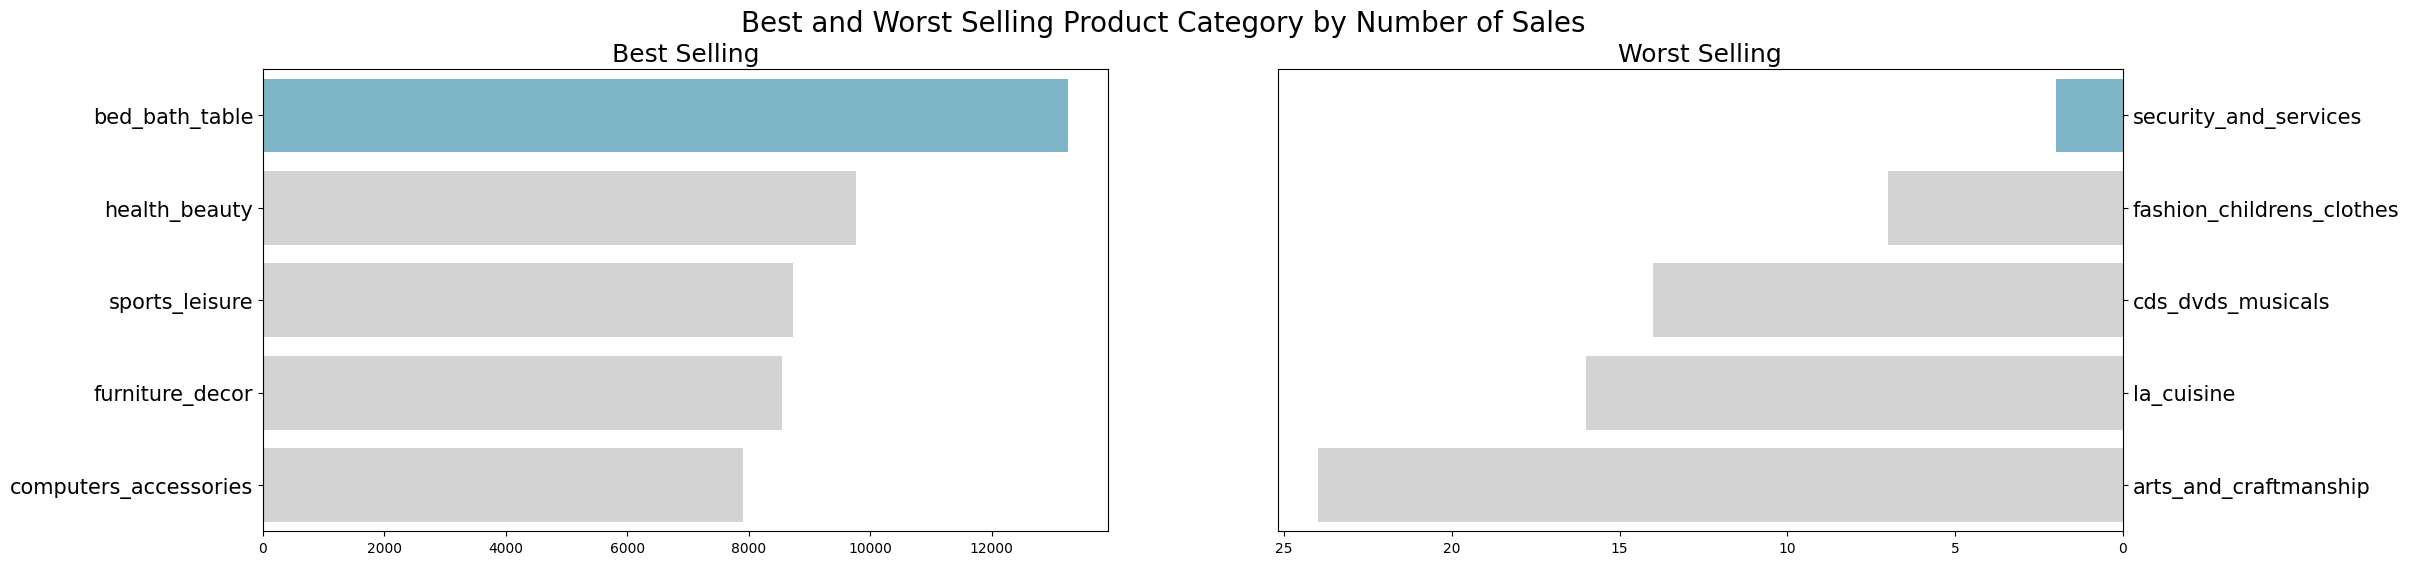

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity", y="product_category_name", data=sum_orders_df.head(5), palette=colors, ax=ax[0], hue="product_category_name")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Selling", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="quantity", y="product_category_name", data=sum_orders_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1], hue="product_category_name")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Selling", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Selling Product Category by Number of Sales", fontsize=20)
plt.show()

### Metode pembayaran mana yang paling banyak dan sedikit digunakan oleh pelanggan?

In [110]:
sum_order_payments_df = all_df.groupby('payment_type').order_id.nunique().sort_values(ascending=False).reset_index()
sum_order_payments_df = sum_order_payments_df.rename(columns={"order_id": "quantity"})
sum_order_payments_df

,payment_type,quantity
0,credit_card,74274
1,boleto,19167
2,voucher,3677
3,debit_card,1481


C:\Users\User\AppData\Local\Temp\ipykernel_8816\2936920969.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="quantity", y="payment_type", data=sum_order_payments_df.head(5), palette=colors, ax=ax[0], hue="payment_type")
C:\Users\User\AppData\Local\Temp\ipykernel_8816\2936920969.py:11: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="quantity", y="payment_type", data=sum_order_payments_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1], hue="payment_type")


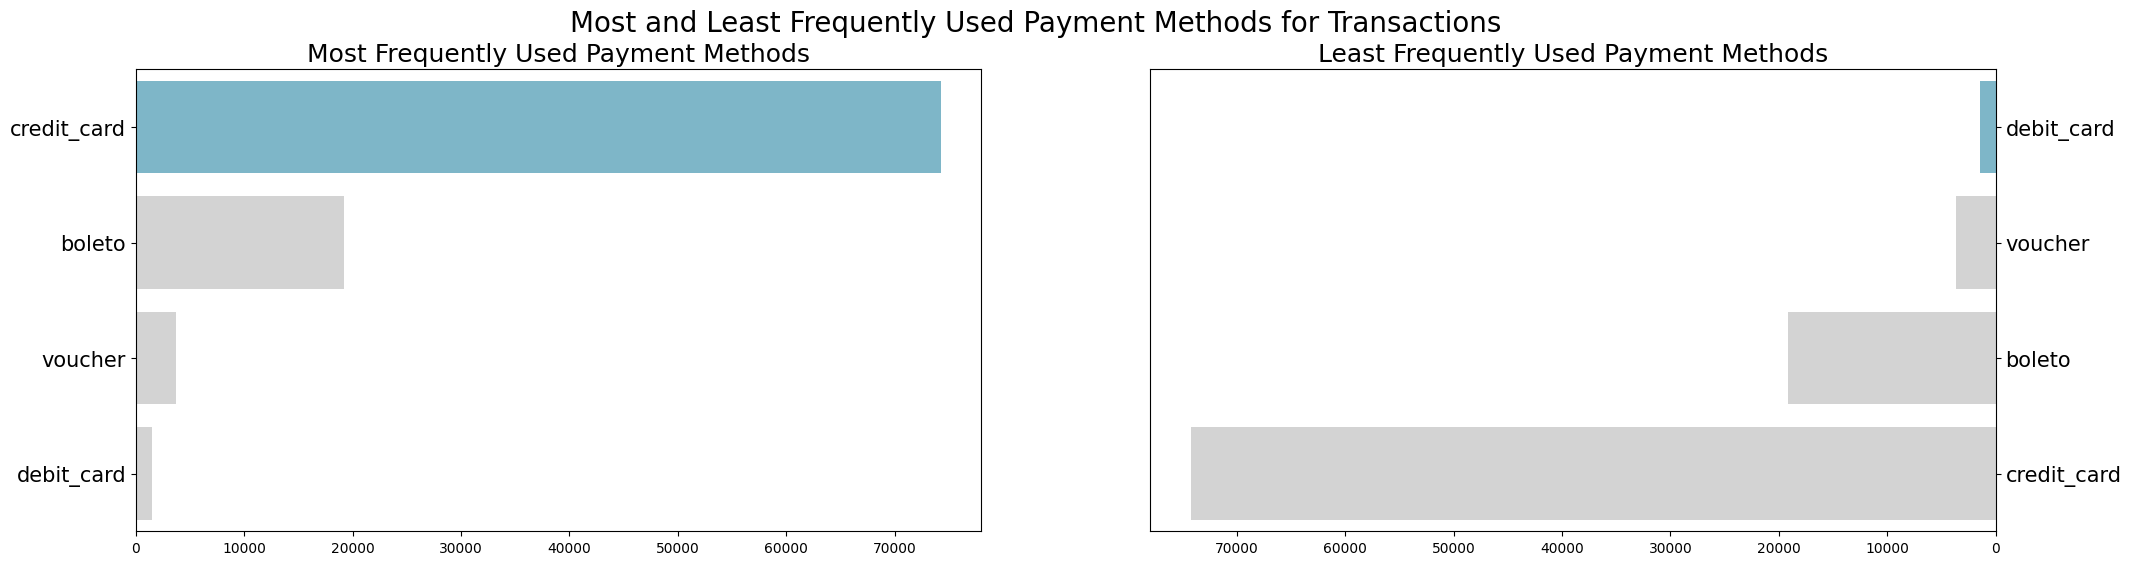

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity", y="payment_type", data=sum_order_payments_df.head(5), palette=colors, ax=ax[0], hue="payment_type")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Most Frequently Used Payment Methods", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="quantity", y="payment_type", data=sum_order_payments_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1], hue="payment_type")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Least Frequently Used Payment Methods", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Most and Least Frequently Used Payment Methods for Transactions", fontsize=20)
plt.show()

### **Insight:**
- Kategori produk yang paling banyak dibeli adalah bed_bath_table dan yang paling sedikit dibeli adalah security_and_services
- Metode pembayaran yang paling sering digunakan adalah credit card dan yang paling jarang adalah debit card

## Geospatial Analysis

Analisis ini bertujuan untuk mengidentifikasi dan memvisualisasikan distribusi transaksi berdasarkan lokasi geografis dengan menghasilkan heatmap untuk menunjukkan kepadatan transaksi dan menandai lokasi dengan jumlah transaksi terbanyak

In [112]:
geolocation_deduplicated = geolocation_df.groupby('geolocation_zip_code_prefix').first().reset_index()

all_df = pd.merge(
    all_df,
    geolocation_deduplicated,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)

In [113]:
transaction_counts = all_df.groupby('geolocation_zip_code_prefix').agg(
    total_transactions=('customer_id', 'count'),
    latitude=('geolocation_lat', 'first'),
    longitude=('geolocation_lng', 'first'),
    city=('geolocation_city', 'first'),
    state=('geolocation_state', 'first')
).reset_index()

gdf = gpd.GeoDataFrame(
    transaction_counts,
    geometry=gpd.points_from_xy(transaction_counts.longitude, transaction_counts.latitude)
)

gdf.crs = "EPSG:4326"

# Peta berpusat di Sao Paulo
m = folium.Map(location=[-23.5505, -46.6333], zoom_start=4)

heat_data = [[row['latitude'], row['longitude'], row['total_transactions']] for _, row in transaction_counts.iterrows()]
HeatMap(heat_data, radius=15).add_to(m)

top_10 = transaction_counts.nlargest(10, 'total_transactions')

for _, row in top_10.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['total_transactions']/50,
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"{row['city']} - {row['total_transactions']} transaksi"
    ).add_to(m)

m

In [119]:
all_df.to_csv("./dashboard/all_df.csv", index=False)

## Conclusion

- Kategori produk yang paling banyak dibeli yaitu **bed_bath_table** dan paling sedikit yaitu **security_and_services**
- Metode pembayaran yang paling sering digunakan adalah **credit card** dan yang paling jarang adalah **debit card**